# Week 2 – Project 1  
## Time Series & Category Charts using Video Game Sales Dataset

**Dataset:** Video Game Sales (`vgsales.csv`)  
**Objective:** To analyze global video game sales trends over time and compare sales across different game genres using time series and category-based charts.


In [7]:
# Data Manipulation
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Optional styling (used lightly)
import seaborn as sns

# Set a clean style
sns.set(style="whitegrid")

## Importing the Dataset

The dataset used in this project is a real-world video game sales dataset.  
It is stored as a CSV file extracted from a ZIP archive and is loaded using Pandas for further analysis.


In [8]:
df = pd.read_csv("data/vgsales.csv")

In [11]:
# First five rows of the dataset
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [12]:
# Last five rows of the dataset
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


## Dataset Shape

The shape of the dataset is checked to understand the number of rows and columns present in the data.  
This provides an overview of the dataset size and helps assess its suitability for analysis.


In [13]:
# Shape of the dataset
df.shape

(16598, 11)

## Columns Present in the Dataset

To understand the structure of the dataset, the column names are displayed.  
This helps identify which variables are available for time series and category-based analysis.


In [14]:
# Columns present in the dataset
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

## Dataset Summary

A concise summary of the dataset is generated to understand the data types, non-null values, and memory usage.  
This helps identify missing values and ensures the dataset is ready for analysis.


In [15]:
# A concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


The dataset consists of 16,327 entries and 11 columns.  
The `Year` column is of integer type and contains no missing values, making it suitable for time series analysis.  
All sales-related columns are numeric, which allows direct aggregation and visualization.  
A small number of missing values are present in the `Publisher` column, which does not affect the analysis for this project.


## Checking Missing Values

Missing values are checked to identify any incomplete data that may affect the analysis.  
This step ensures data quality before performing time series and category-based visualizations.


In [17]:
# Checking missing values
df.isna().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


The dataset contains no missing values in the `Year`, `Genre`, and `Global_Sales` columns, which are essential for this project.  
A small number of missing values are present in the `Publisher` column. Since the publisher information is not required for time series or category analysis, these missing values do not affect the project.


## Descriptive Statistics

Descriptive statistics provide a summary of the numerical columns in the dataset, including measures such as mean, minimum, maximum, and quartiles.  
This helps understand the distribution and range of sales values before performing visual analysis.


In [18]:
# Generating descriptive statistics summary
df.describe().round()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.0,16327.0,16598.0,16598.0,16598.0,16598.0,16598.0
mean,8301.0,2006.0,0.0,0.0,0.0,0.0,1.0
std,4792.0,6.0,1.0,1.0,0.0,0.0,2.0
min,1.0,1980.0,0.0,0.0,0.0,0.0,0.0
25%,4151.0,2003.0,0.0,0.0,0.0,0.0,0.0
50%,8300.0,2007.0,0.0,0.0,0.0,0.0,0.0
75%,12450.0,2010.0,0.0,0.0,0.0,0.0,0.0
max,16600.0,2020.0,41.0,29.0,10.0,11.0,83.0


The descriptive statistics show that global sales values vary widely across video games.  
The presence of high maximum values compared to the mean indicates that a small number of games contribute significantly to total sales, while most games have relatively lower sales figures.


## Time Variable Handling

Unlike transactional datasets that contain exact dates, this dataset provides sales information at a yearly level.  
Therefore, time series analysis is performed using the `Year` column directly without extracting month or date components.

In [19]:
# Year-wise global sales aggregation
sales_by_year = df.groupby('Year')['Global_Sales'].sum()
sales_by_year.head()

,Global_Sales
Year,
1980.0,11.38
1981.0,35.77
1982.0,28.86
1983.0,16.79
1984.0,50.36


## Year-wise Sales Aggregation

Since the dataset contains sales information at a yearly level, global sales are aggregated year-wise for time series analysis.


In [20]:
# Grouping year-wise global sales
df_temp = df.groupby('Year')['Global_Sales'].sum().reset_index()

df_temp.head()

,Year,Global_Sales
0,1980.0,11.38
1,1981.0,35.77
2,1982.0,28.86
3,1983.0,16.79
4,1984.0,50.36


## Time Series Visualization

A line chart is used to visualize global video game sales over different years.  
This helps identify overall trends and changes in sales over time.


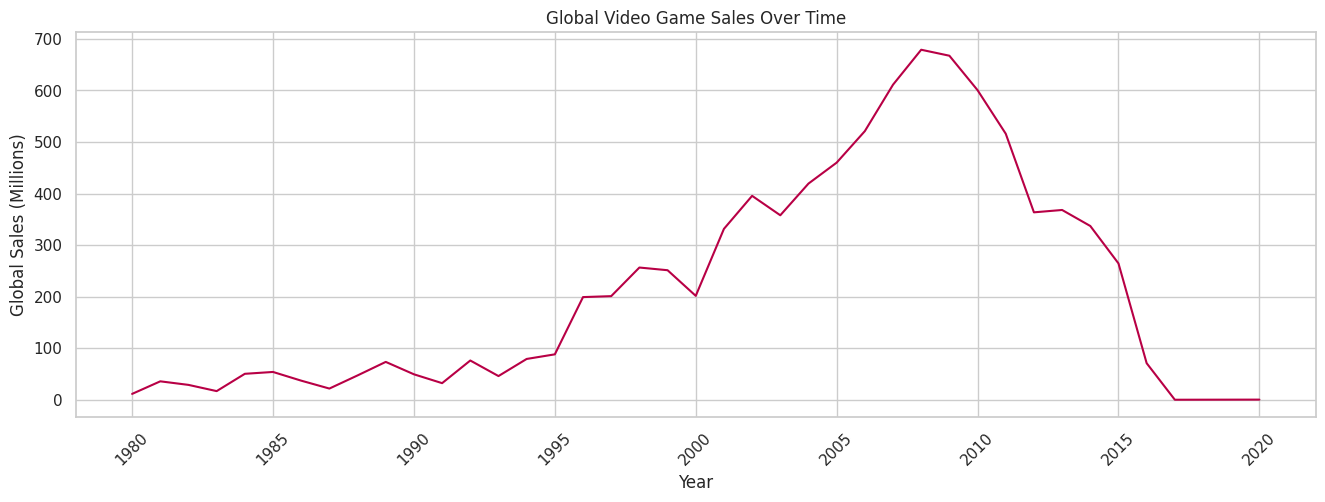

In [47]:
# Setting the figure size
plt.figure(figsize=(16, 5))

# Plotting year-wise global sales
plt.plot(df_temp['Year'], df_temp['Global_Sales'], color='#b80045')

# Formatting
plt.xlabel("Year")
plt.ylabel("Global Sales (Millions)")
plt.title("Global Video Game Sales Over Time")
plt.xticks(rotation=45)

# Save chart as PNG
plt.savefig("time_series_global_sales.png", dpi=300, bbox_inches="tight")

# Display the chart
plt.show()

## Top-Selling Video Games

This section identifies the top-selling video games based on global sales.  
It helps understand which individual games have contributed the most to overall sales.


In [22]:
# Grouping video games by global sales
game_sales = pd.DataFrame(
    df.groupby('Name')['Global_Sales'].sum()
)

# Sorting in descending order
game_sales.sort_values(by='Global_Sales', ascending=False, inplace=True)

# Display top 10 games
game_sales.head(10)

,Global_Sales
Name,
Wii Sports,82.74
Grand Theft Auto V,55.92
Super Mario Bros.,45.31
Tetris,35.84
Mario Kart Wii,35.82
Wii Sports Resort,33.00
Pokemon Red/Pokemon Blue,31.37
Call of Duty: Black Ops,31.03
Call of Duty: Modern Warfare 3,30.83


## Best-Selling Video Games

Since the dataset does not contain quantity sold, best-selling games are identified based on total global sales value.


In [24]:
# Grouping video games by global sales
best_selling_games = (
    df.groupby('Name')['Global_Sales']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

best_selling_games

,Global_Sales
Name,
Wii Sports,82.74
Grand Theft Auto V,55.92
Super Mario Bros.,45.31
Tetris,35.84
Mario Kart Wii,35.82
Wii Sports Resort,33.00
Pokemon Red/Pokemon Blue,31.37
Call of Duty: Black Ops,31.03
Call of Duty: Modern Warfare 3,30.83


## Top 10 Best-Selling Video Games

This chart shows the top 10 video games based on total global sales.  
It helps identify individual games that have contributed the most to overall sales.


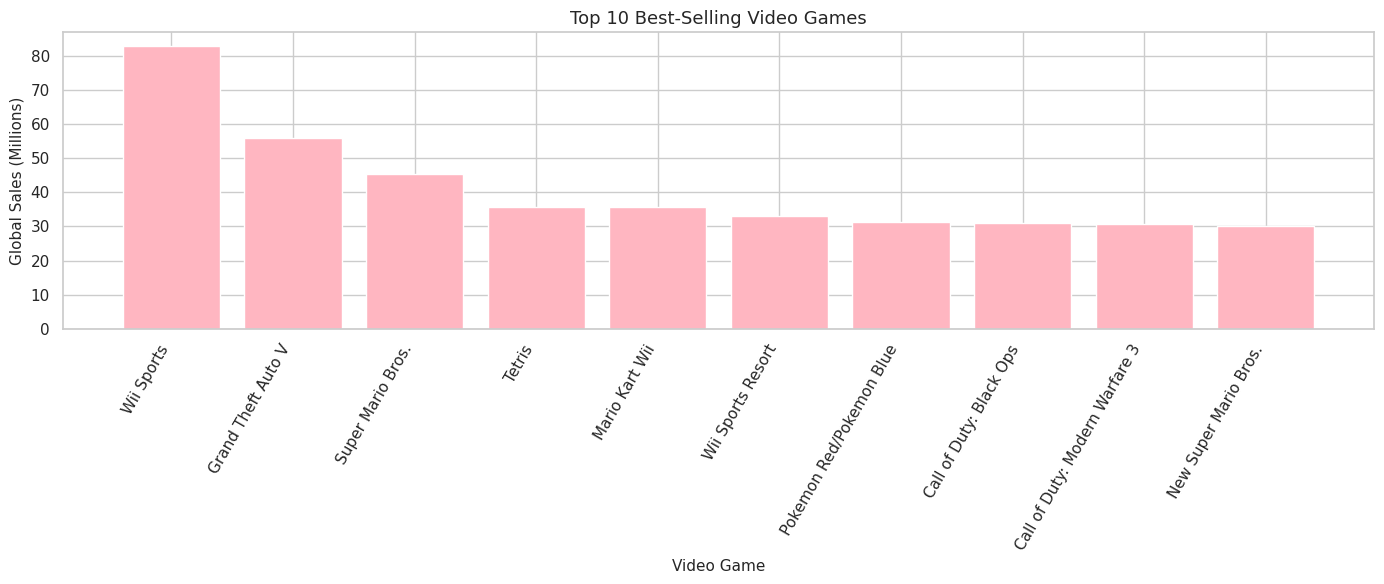

In [48]:
plt.figure(figsize=(14, 6))
plt.bar(
    top_games.index,
    top_games.values,
    color="lightpink"
)

plt.xlabel("Video Game", fontsize=11)
plt.ylabel("Global Sales (Millions)", fontsize=11)
plt.title("Top 10 Best-Selling Video Games", fontsize=13)

plt.xticks(rotation=60, ha='right')
plt.tight_layout()

# Save chart as PNG
plt.savefig("top_10_best_selling_video_games.png", dpi=300, bbox_inches="tight")

plt.show()

## Best-Selling Game Genres

This section identifies the game genres with the highest total global sales.


In [25]:
best_selling_genres = (
    df.groupby('Genre')['Global_Sales']
      .sum()
      .sort_values(ascending=False)
)

best_selling_genres

,Global_Sales
Genre,
Action,1751.18
Sports,1330.93
Shooter,1037.37
Role-Playing,927.37
Platform,831.37
Misc,809.96
Racing,732.04
Fighting,448.91
Simulation,392.20


## Genre-wise Sales Analysis

This chart compares total global sales across different video game genres to understand category-level performance.


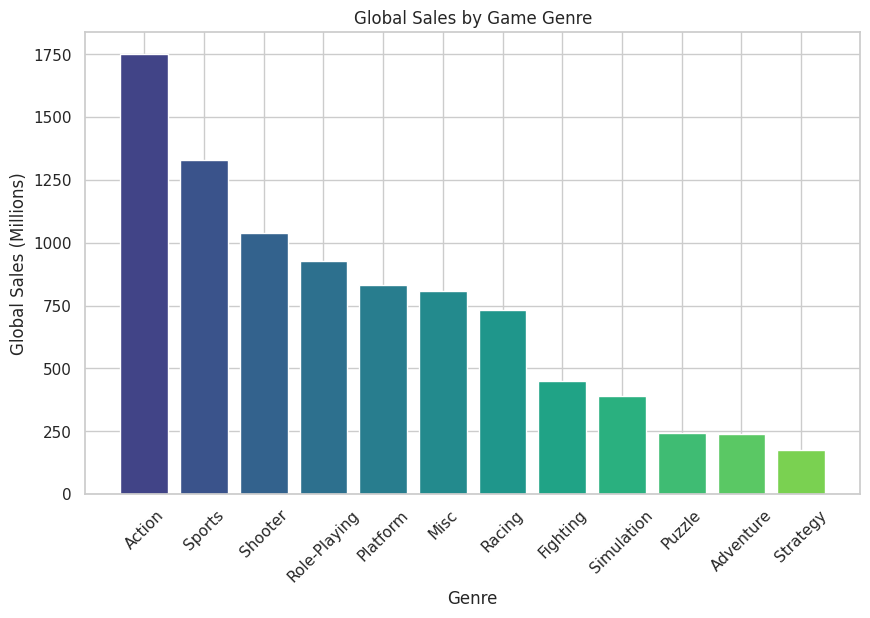

In [49]:
import numpy as np

colors = plt.cm.viridis(
    np.linspace(0.2, 0.8, len(genre_sales))
)

plt.figure(figsize=(10, 6))
plt.bar(genre_sales.index, genre_sales.values, color=colors)

plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Global Sales (Millions)")
plt.title("Global Sales by Game Genre")

# Save chart as PNG
plt.savefig("genre_sales_bar_chart.png", dpi=300, bbox_inches="tight")

plt.show()

## Distribution of Video Games by Platform

This count plot shows the number of video games released on each platform.


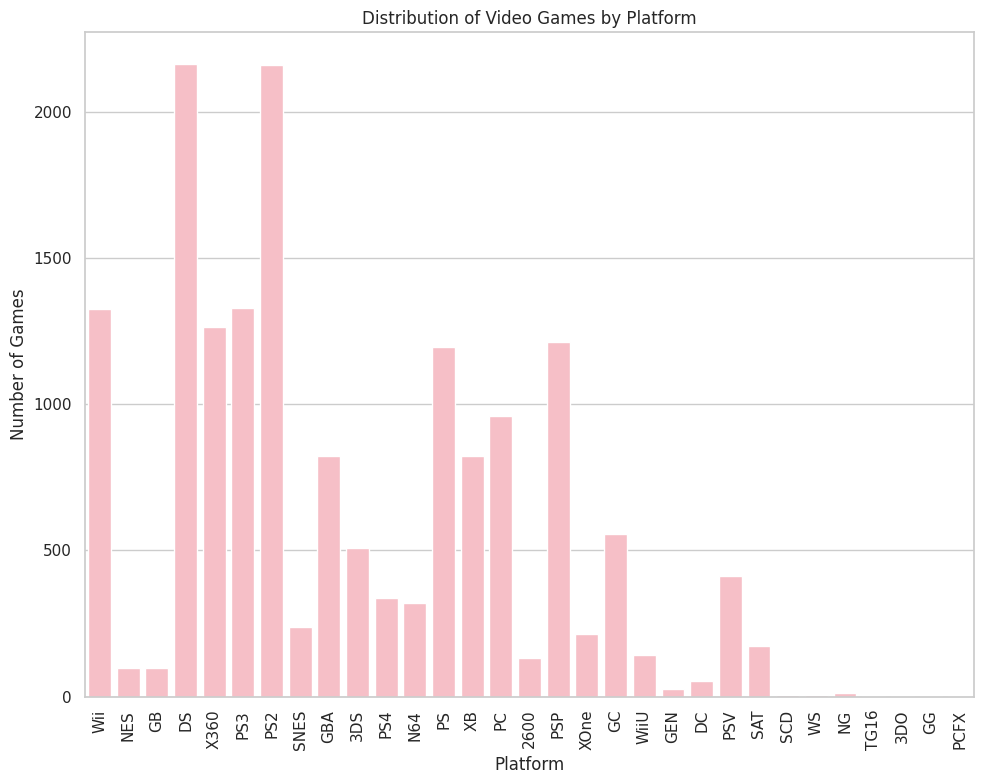

In [50]:
# Setting the figure size
plt.figure(figsize=(10, 8))

# Count plot using Platform column
sns.countplot(x='Platform', data=df, color="lightpink")

# Formatting
plt.xticks(rotation=90)
plt.xlabel("Platform")
plt.ylabel("Number of Games")
plt.title("Distribution of Video Games by Platform")

plt.tight_layout()

# Save chart as PNG
plt.savefig("platform_distribution_countplot.png", dpi=300, bbox_inches="tight")

plt.show()

## Genre and Platform-wise Sales Analysis

This analysis examines global video game sales across combinations of genres and platforms to understand how different platforms perform within each genre.


In [40]:
# Grouping by Genre and Platform and summing global sales
genre_platform_sales = (
    df.groupby(['Genre', 'Platform'])['Global_Sales']
      .sum()
      .reset_index()
)

# Sorting by Genre and Global Sales
genre_platform_sales.sort_values(
    by=['Genre', 'Global_Sales'],
    ascending=[True, False]
)

,Genre,Platform,Global_Sales
13,Action,PS3,307.88
12,Action,PS2,272.76
21,Action,X360,242.67
11,Action,PS,127.05
19,Action,Wii,118.58
...,...,...,...
292,Strategy,XOne,0.38
283,Strategy,PSV,0.31
287,Strategy,WS,0.20
275,Strategy,GEN,0.19


In [41]:
top_platform_per_genre = (
    genre_platform_sales
    .sort_values(['Genre', 'Global_Sales'], ascending=[True, False])
    .groupby('Genre')
    .head(1)
)

top_platform_per_genre

,Genre,Platform,Global_Sales
13,Action,PS3,307.88
28,Adventure,DS,47.29
62,Fighting,PS2,92.60
93,Misc,Wii,221.06
108,Platform,NES,95.78
127,Puzzle,DS,84.29
158,Racing,PS2,156.28
173,Role-Playing,DS,126.85
219,Shooter,X360,278.55
226,Simulation,DS,132.03


## Region-wise Sales Share (Pie Chart)

This pie chart represents the percentage contribution of different geographical regions to total global video game sales.  
It helps understand which regions contribute most to the gaming market.


In [44]:
# Region-wise total sales
region_sales = {
    'North America': df['NA_Sales'].sum(),
    'Europe': df['EU_Sales'].sum(),
    'Japan': df['JP_Sales'].sum(),
    'Other Regions': df['Other_Sales'].sum()
}

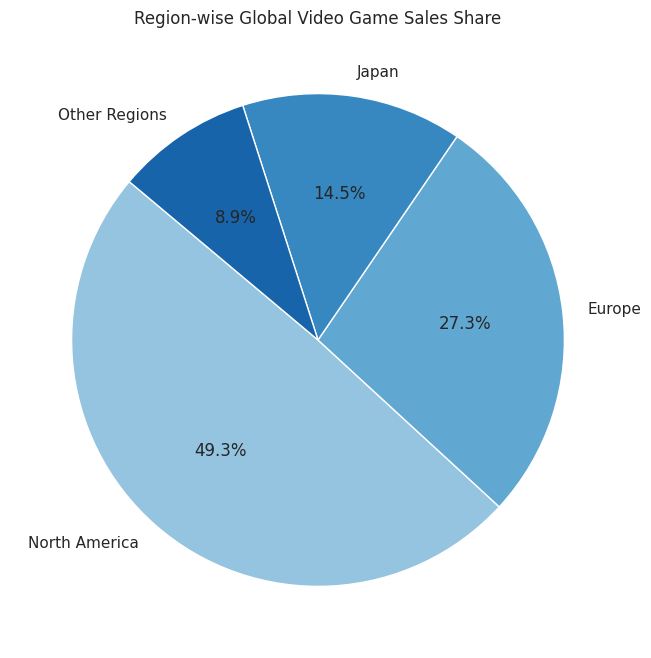

In [51]:
import numpy as np

# Professional gradient colors
colors = plt.cm.Blues(np.linspace(0.4, 0.8, len(region_sales)))

plt.figure(figsize=(8, 8))

plt.pie(
    region_sales.values(),
    labels=region_sales.keys(),
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)

plt.title("Region-wise Global Video Game Sales Share")

# Save as PNG
plt.savefig("region_sales_pie_chart.png", dpi=300, bbox_inches="tight")

plt.show()

### Interpretation

The pie chart shows that North America and Europe contribute the largest share of global video game sales, while Japan and other regions contribute comparatively smaller portions.  
This highlights regional differences in the global gaming market.


## Short Summary

This project analyzes a real-world video game sales dataset using time series and category-based visualizations.  
A line chart was used to study global sales trends over time, bar charts were used to compare sales across different categories, and a pie chart was used to represent sales share.

The visual analysis highlights that video game sales are concentrated in specific years, categories, and regions.  
Overall, the project demonstrates how effective data visualization helps in understanding patterns and gaining meaningful insights from large datasets.


## Chart Choice and Formatting


Line charts were selected for time series analysis because they clearly show trends and changes in sales over time.  
Since the dataset provides sales information at a yearly level, **year-wise aggregation** was used for the time series analysis instead of monthly or quarterly aggregation.

Bar charts were used to compare categories as they allow easy visual comparison between different groups.  
Pie charts were chosen to represent proportional sales share across categories and regions.

All charts include clear titles, labeled axes, and appropriately rotated tick labels to improve readability.  
Professional and consistent color schemes were used to maintain a clean visual appearance, and legends were included where necessary to clearly identify categories.

